In [1]:
import pandas as pd
import numpy as np
from deepplot import ROC_threshold, Roc_Auc_Plot, classification_evaluation

<Figure size 432x288 with 0 Axes>

In [40]:
cli_train_df = pd.read_csv('./data2/train_results.csv')
cli_test_df = pd.read_csv('./data2/test_results.csv')
cli_extest_df = pd.read_csv('./data2/extest_results.csv')

In [41]:
len(extest_df)

45

In [42]:
train_y_score = cli_train_df['train_pred']
train_y_true = cli_train_df['train_label']
train_thre = ROC_threshold(train_y_true, train_y_score)[0]
print(train_thre)

0.51685315972792


In [5]:
test_y_score = np.array(cli_test_df['test_pred'])
test_y_true = cli_test_df['test_label']
test_thre = ROC_threshold(test_y_true, test_y_score)
print(test_thre)

(0.690159416476732, [0.25, 0.9130434782608695])


In [6]:
extest_y_score = np.array(extest_df['extest_pred'])
extest_y_true = extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)
print(extest_thre)

(0.452291774883668, [0.47368421052631576, 0.9615384615384616])


In [43]:
extest_y_score = np.array(cli_extest_df['extest_pred'])
extest_y_true = cli_extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)[0]
print(extest_thre)

0.452291774883668


In [44]:
extest_y_pred = extest_y_score > train_thre 
print(test_y_pred)

[False  True  True  True  True  True  True False False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False  True False  True  True  True  True  True False  True  True
 False False  True  True False  True False  True False  True  True  True
  True  True False  True False False False  True False False  True False
  True False False False  True  True  True  True False  True]


In [45]:
cli_extest_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})
test_results.head()

,y_true,y_pred,y_score
0,1,False,0.671528
1,1,True,0.923465
2,1,True,0.963128
3,1,True,0.831344
4,1,True,0.995432


In [46]:
cli_extest_results.to_csv('./out_data2/external_clinical.csv',index=0)

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

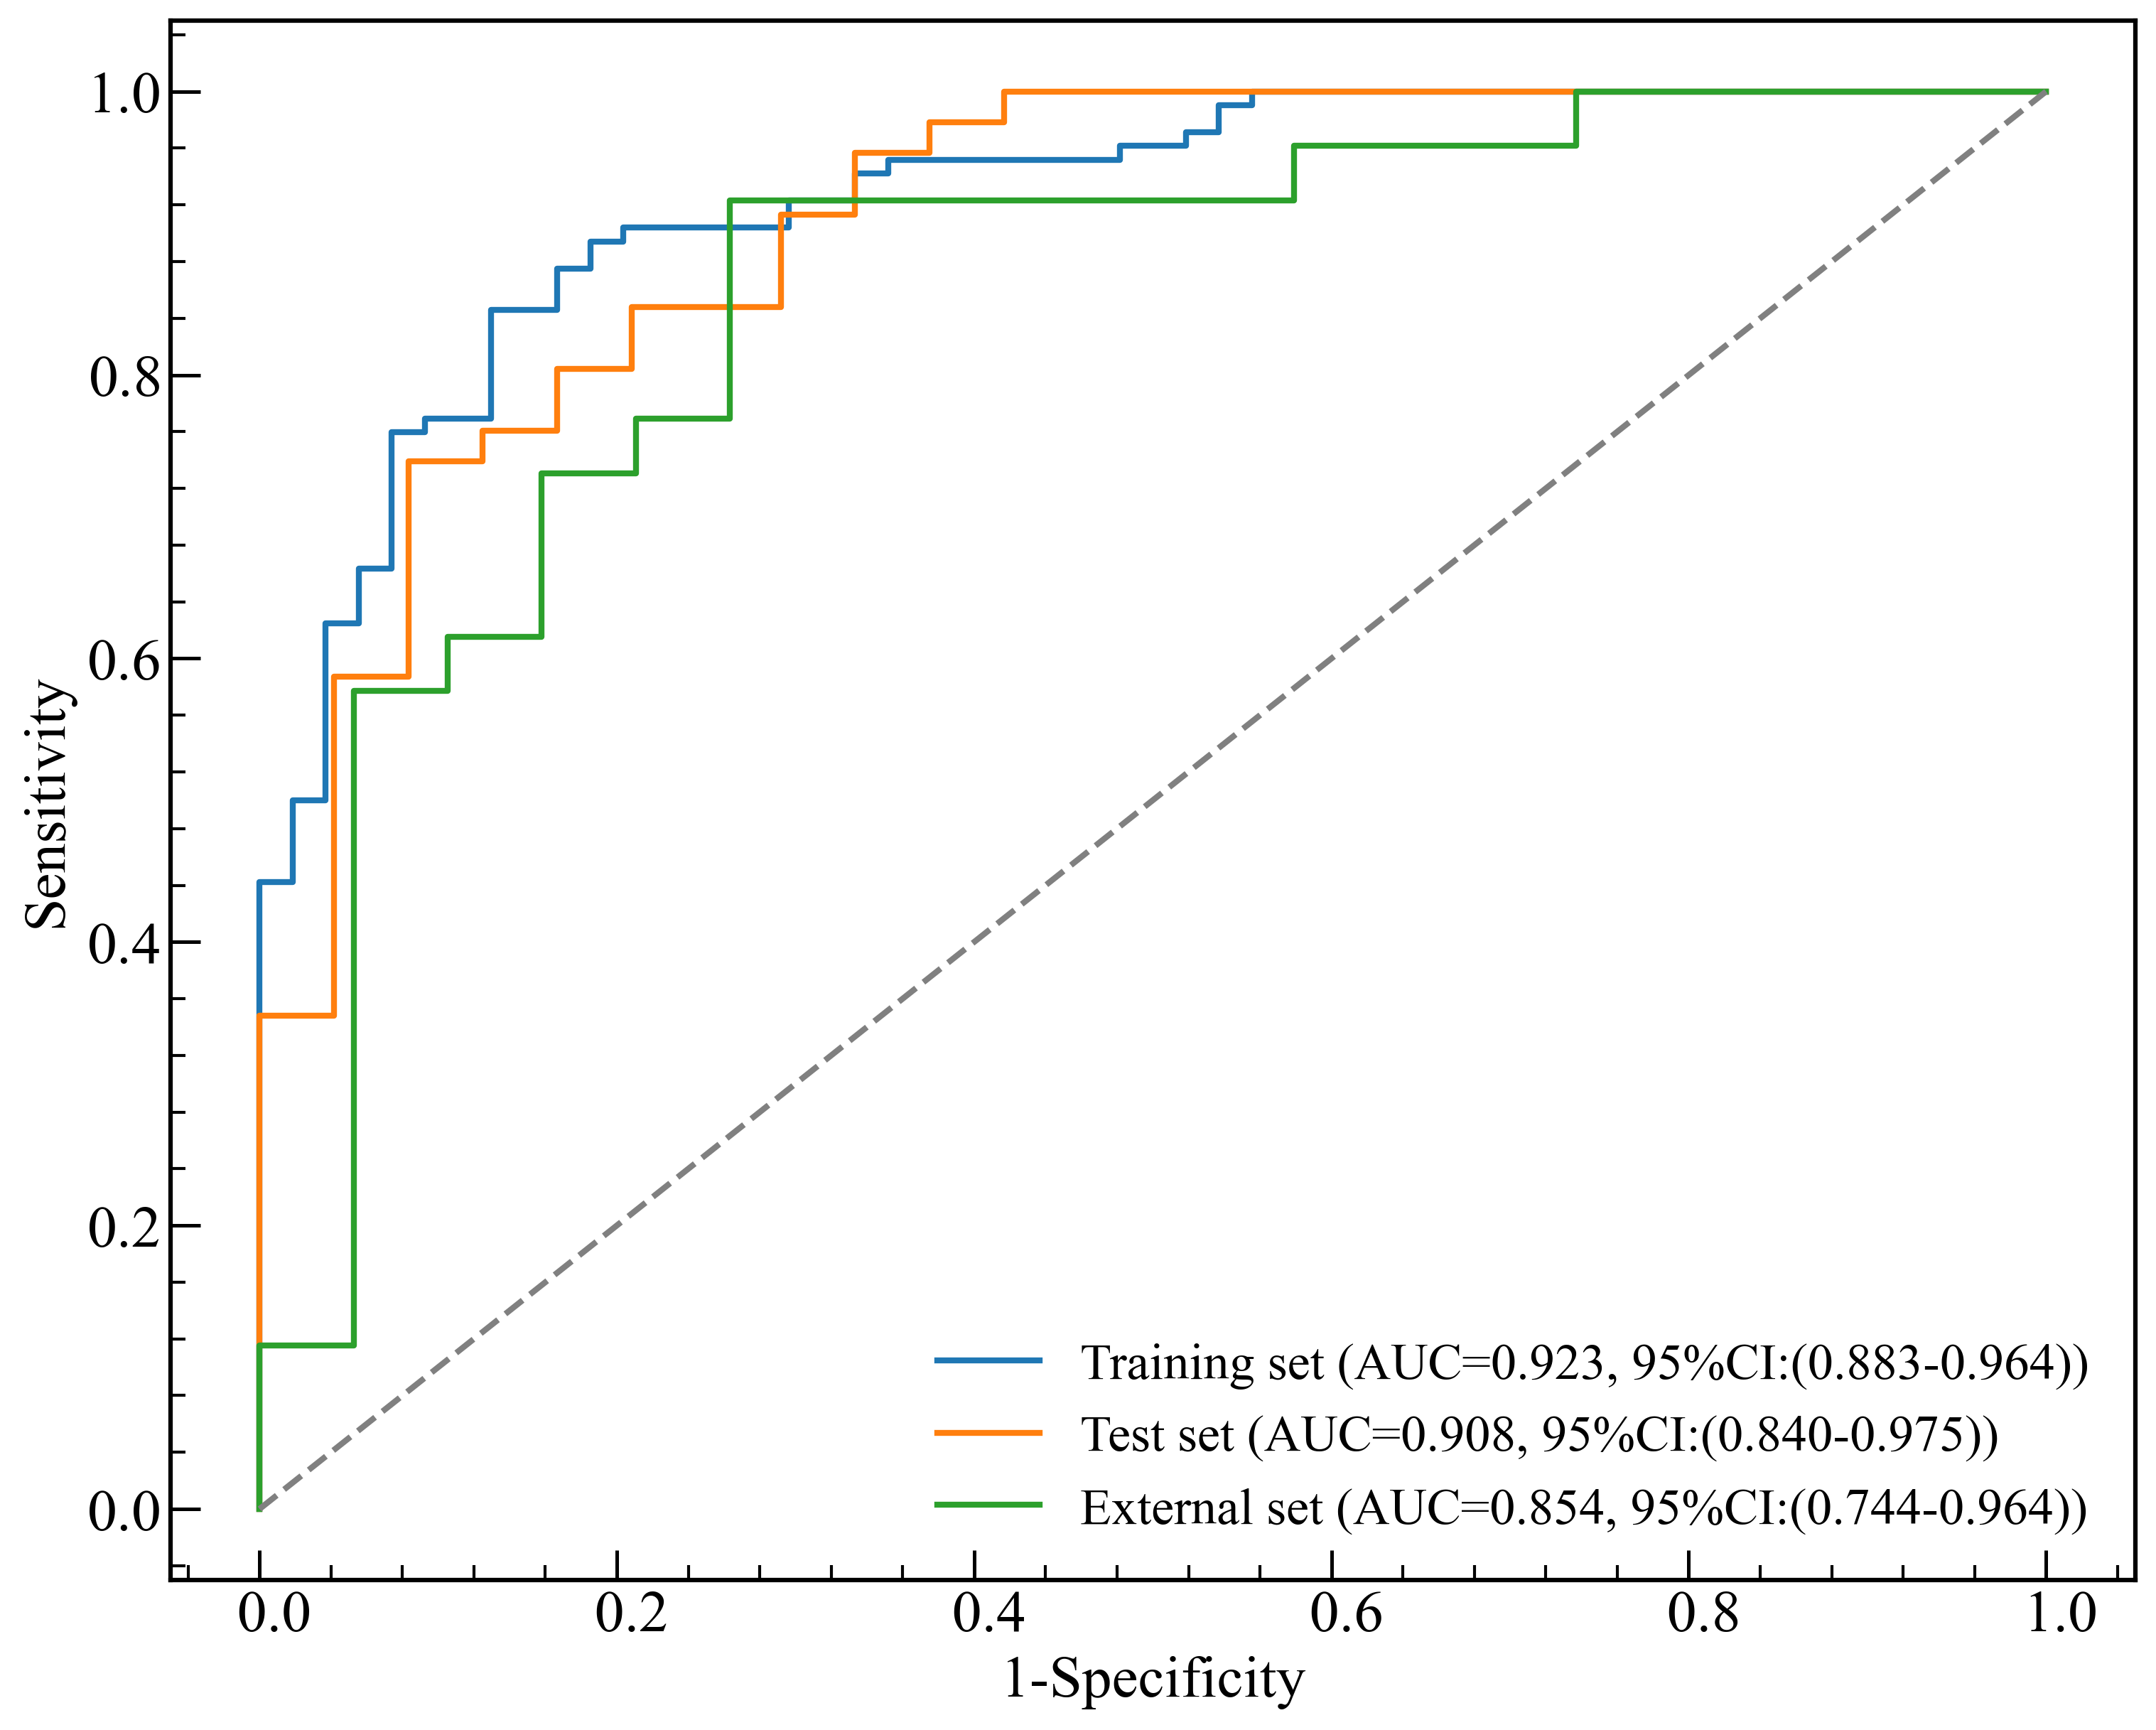

In [17]:
Roc_Auc_Plot(results_list, legends=['Training set', 'Test set', 'External set'])

In [18]:
print(extest_y_score)
print(np.array(extest_y_true))
print({x:y for x, y in zip(extest_y_score,np.array(extest_y_true))})

[0.65164621 0.02885684 0.27862127 0.92049742 0.96939489 0.02550113
 0.97799221 0.98801643 0.99458335 0.80866897 0.9867066  0.44334423
 0.97225723 0.63693249 0.98910692 0.01779918 0.69413629 0.92960475
 0.94002297 0.90780572 0.95958131 0.93918679 0.22971186 0.90876465
 0.20293641 0.96316325 0.76474897 0.63101396 0.99043564 0.1858429
 0.6056433  0.12195424 0.72485779 0.82083534 0.42969022 0.95736447
 0.65390039 0.9708835  0.11860824 0.38286942 0.14225788 0.92495711
 0.53450969 0.12806918 0.95696528]
[1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 1]
{0.651646207068992: 1, 0.0288568400287431: 0, 0.278621272095362: 0, 0.92049741537857: 1, 0.969394886120172: 1, 0.0255011267923231: 0, 0.977992214935293: 1, 0.988016431766632: 0, 0.99458334943241: 1, 0.808668972518782: 1, 0.986706602718878: 1, 0.44334422849275: 0, 0.972257228203978: 1, 0.636932486601827: 1, 0.989106918872508: 1, 0.0177991776338332: 0, 0.694136292540225: 0, 0.929604749160617: 1, 0.94002

In [19]:
classification_evaluation(extest_y_true, extest_y_pred, extest_y_score)

{'auc': 0.8542510121457491,
 'auc_CI': [0.7443580450180285, 0.9641439792734696],
 'sensitivity(recall)': 0.7692307692307693,
 'specificity': 0.7368421052631579,
 'accuracy': 0.7555555555555555,
 'precision': 0.8,
 'f1': 0.7843137254901961}

In [20]:
classification_evaluation(train_y_true, train_y_pred, train_y_score)

{'auc': 0.9230769230769231,
 'auc_CI': [0.8825606223251018, 0.9635932238287445],
 'sensitivity(recall)': 0.8365384615384616,
 'specificity': 0.8703703703703703,
 'accuracy': 0.8481012658227848,
 'precision': 0.925531914893617,
 'f1': 0.8787878787878788}

In [21]:
classification_evaluation(test_y_true, test_y_pred, test_y_score)

{'auc': 0.9076086956521738,
 'auc_CI': [0.8398191438079539, 0.9753982474963938],
 'sensitivity(recall)': 0.8478260869565217,
 'specificity': 0.7083333333333334,
 'accuracy': 0.8,
 'precision': 0.8478260869565217,
 'f1': 0.8478260869565218}

## External Radiomics

In [38]:
exr_df = pd.read_csv('../manuscript_back_modify_20230104/external_cliradio.csv')
exr_df = exr_df[['label','radiomics_score']]
exr_df.rename(columns={'radiomics_score':'y_score'}, inplace=True)
exr_df.head()

,label,y_score
0,1,0.730589
1,0,0.377057
2,0,0.649151
3,1,0.608155
4,1,0.615327


In [39]:
radio_y_score = np.array(exr_df['y_score'])
radio_y_true = exr_df['label']
radio_thre = ROC_threshold(test_y_true, test_y_score)[0]
print(radio_thre)

0.807553572294638


In [28]:
print(radio_thre)
radio_y_pred = radio_y_score > 0.6
radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})

0.807553572294638


In [29]:
print(len(radio_y_pred))
classification_evaluation(radio_y_true, radio_y_pred, radio_y_score)

45


{'auc': 0.7469635627530364,
 'auc_CI': [0.60482752471476, 0.8890996007913129],
 'sensitivity(recall)': 0.6923076923076923,
 'specificity': 0.6842105263157895,
 'accuracy': 0.6888888888888889,
 'precision': 0.75,
 'f1': 0.7199999999999999}

## Radiological

In [40]:
cli_train_df = pd.read_csv('./data2/train_results.csv')
cli_test_df = pd.read_csv('./data2/test_results.csv')
cli_extest_df = pd.read_csv('./data2/extest_results.csv')

In [41]:
len(extest_df)

45

In [42]:
train_y_score = cli_train_df['train_pred']
train_y_true = cli_train_df['train_label']
train_thre = ROC_threshold(train_y_true, train_y_score)[0]
print(train_thre)

0.51685315972792


In [43]:
extest_y_score = np.array(cli_extest_df['extest_pred'])
extest_y_true = cli_extest_df['extest_label']
extest_thre = ROC_threshold(extest_y_true, extest_y_score)[0]
print(extest_thre)

0.452291774883668


In [44]:
extest_y_pred = extest_y_score > train_thre 
print(test_y_pred)

[False  True  True  True  True  True  True False False  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True False  True False  True  True  True  True  True False  True  True
 False False  True  True False  True False  True False  True  True  True
  True  True False  True False False False  True False False  True False
  True False False False  True  True  True  True False  True]


In [45]:
cli_extest_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})
test_results.head()

,y_true,y_pred,y_score
0,1,False,0.671528
1,1,True,0.923465
2,1,True,0.963128
3,1,True,0.831344
4,1,True,0.995432


In [46]:
cli_extest_results.to_csv('./out_data2/external_clinical.csv',index=0)

## External results

In [55]:
external_radio_results = pd.DataFrame({'y_true':radio_y_true, 'y_pred':radio_y_pred, 'y_score':radio_y_score})
# external_clinical_results = pd.DataFrame({'y_true':test_y_true, 'y_pred':test_y_pred, 'y_score':test_y_score})
external_cliradio_results = pd.DataFrame({'y_true':extest_y_true, 'y_pred':extest_y_pred, 'y_score':extest_y_score})

In [56]:
external_radio_results.to_csv('./out_data2/external_radio.csv',index=0)
# external_clinical_results.to_csv('./out_data2/external_clinical.csv',index=0)
external_cliradio_results.to_csv('./out_data2/external_cliradio.csv',index=0)
external_results_list = ['./out_data2/external_radio.csv','./out_data2/external_clinical.csv', './out_data2/external_cliradio.csv']

<AxesSubplot:xlabel='1-Specificity', ylabel='Sensitivity'>

<Figure size 3000x2400 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

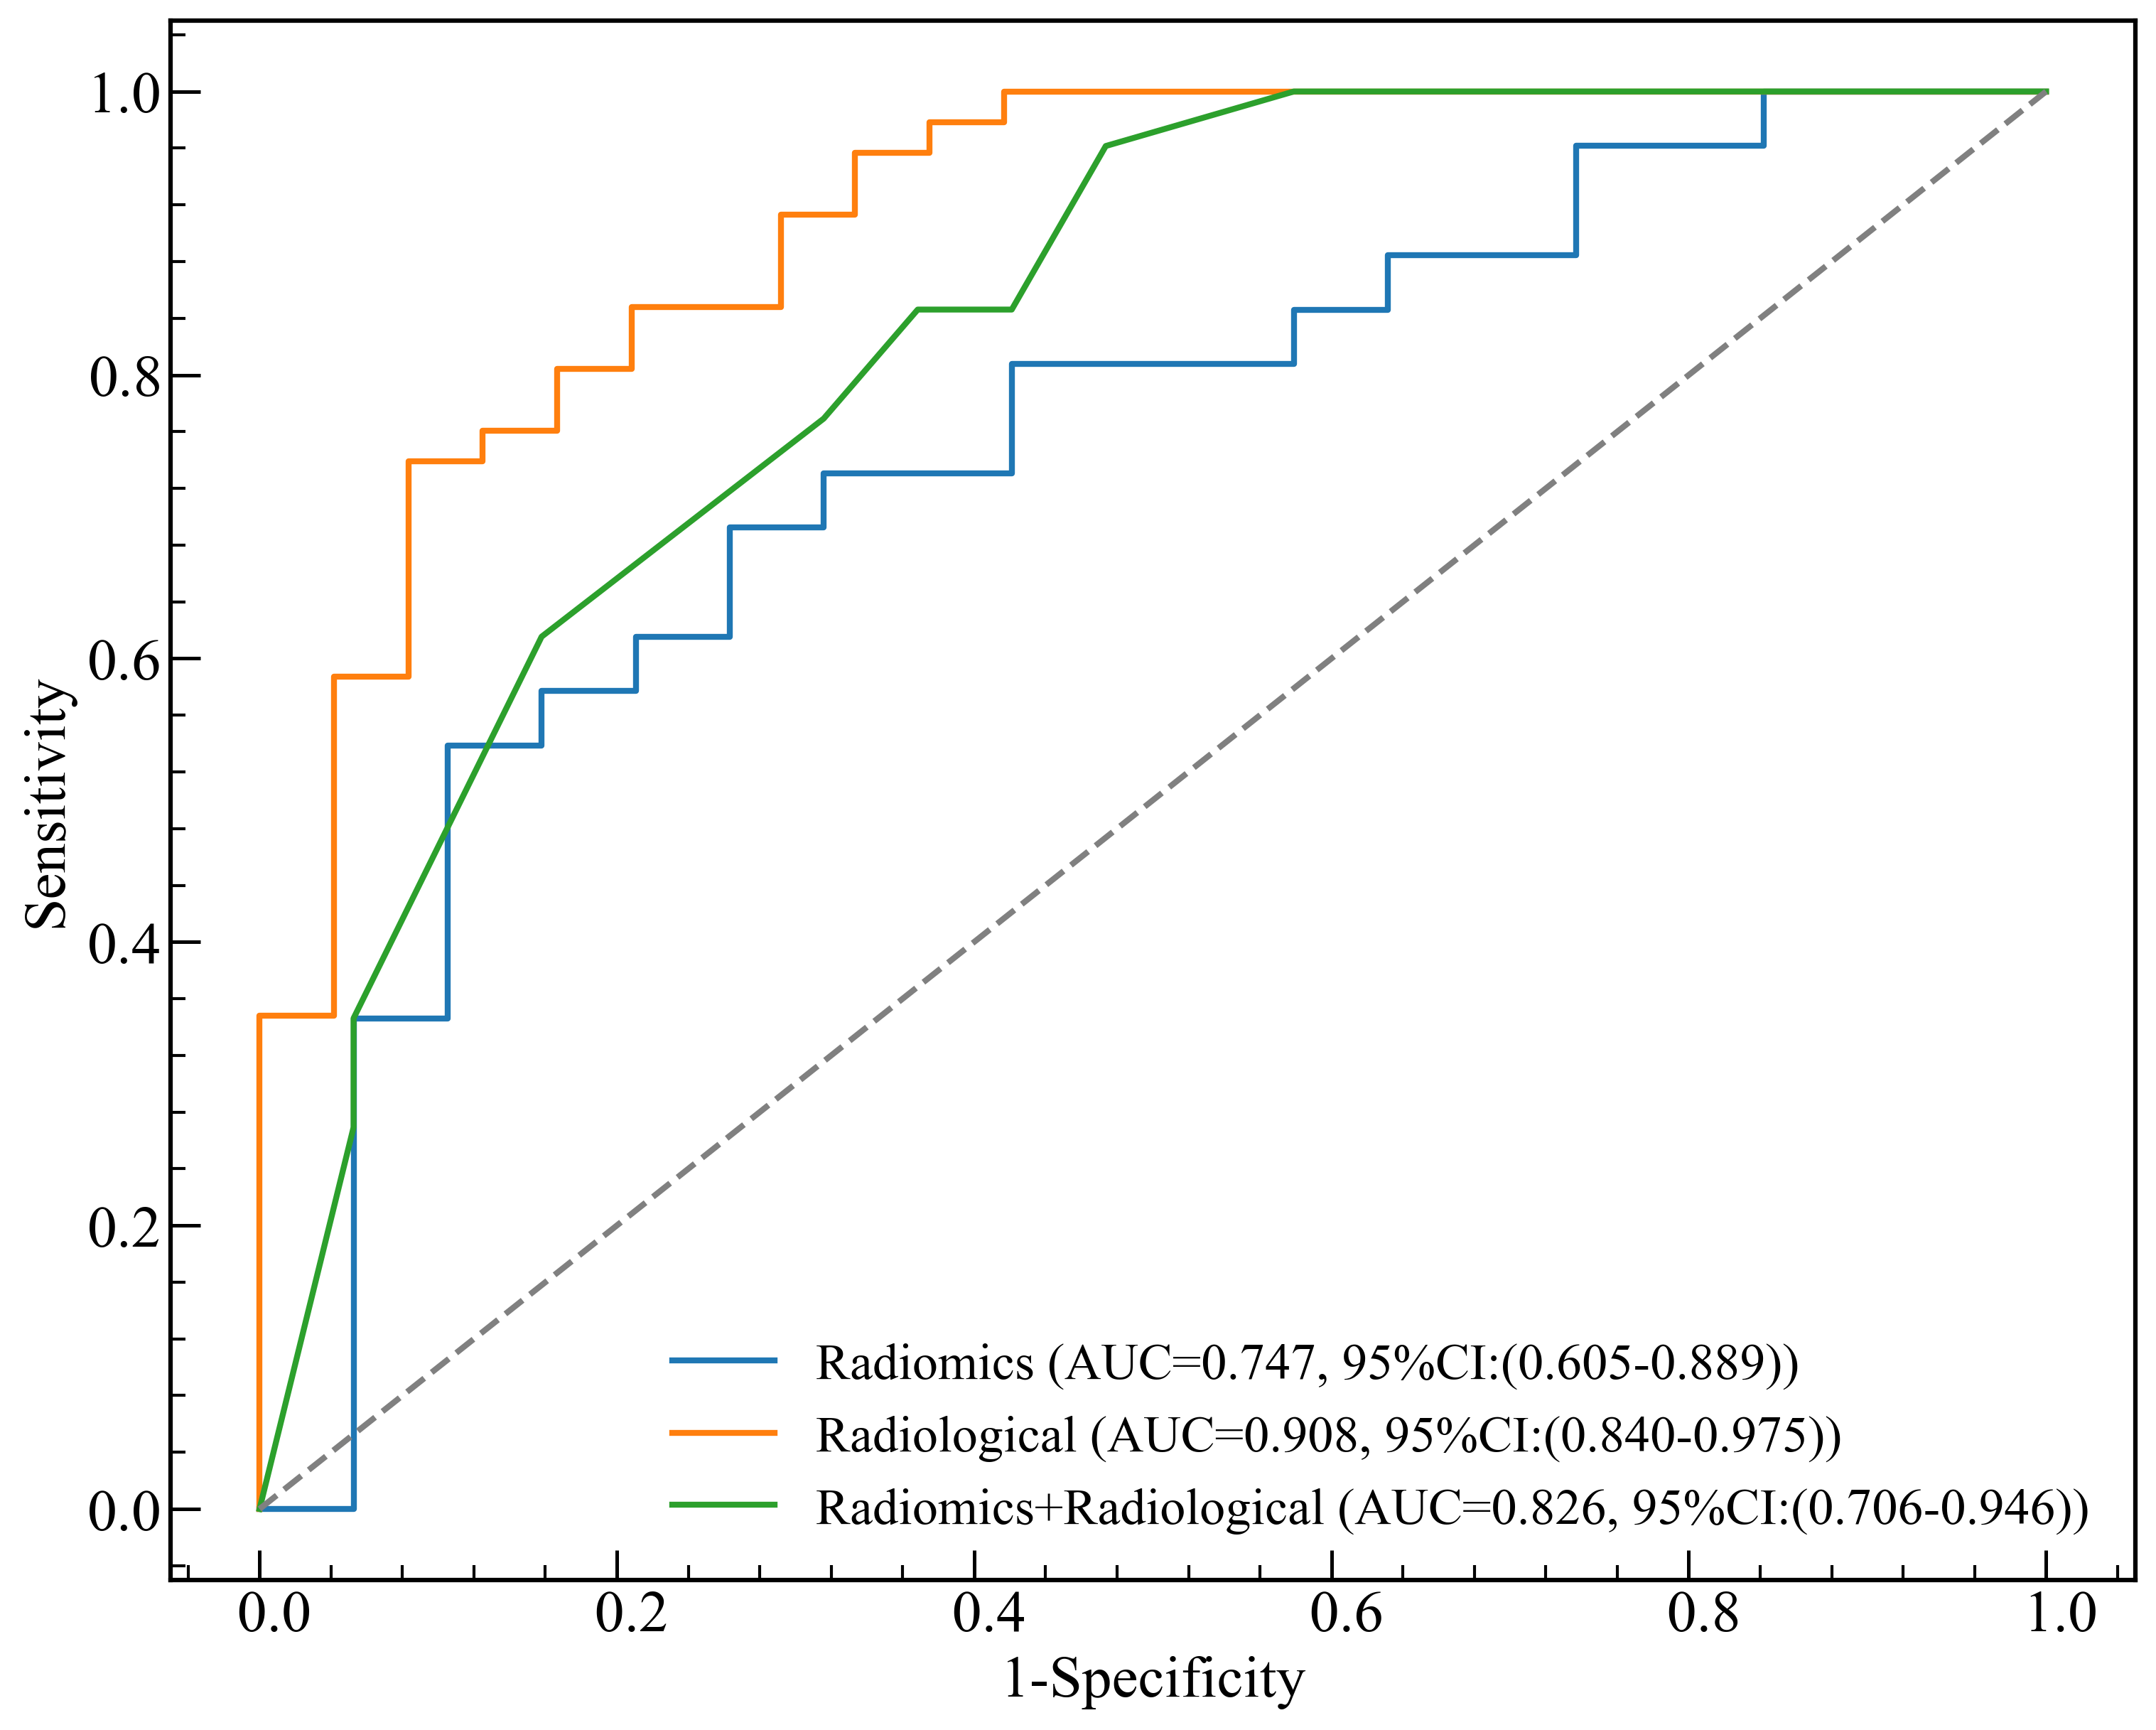

In [57]:
Roc_Auc_Plot(external_results_list, legends=['Radiomics', 'Radiological', 'Radiomics+Radiological'], saved='./roc_external.png')